In [1]:
import sys
sys.path.append("..")

In [2]:
from Datasets.dataframe_sentinel1 import sentinelOne2df
from Datasets.dataframe_sentinel2 import sentinelTwo2df
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/home/mathys/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
Cati2018_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2018").make_df()
Cati2019_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2019").make_df()
Cati2020_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2020").make_df()
Cati2021_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2021").make_df()
Cati2022_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2022").make_df()
Cati2023_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2023").make_df()
Cati2024_vv_vh_df = sentinelOne2df("../Sentinel1_Images_Catillon/2024").make_df()

In [4]:
Cati2018_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2018").make_df()
Cati2019_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2019").make_df()
Cati2020_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2020").make_df()
Cati2021_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2021").make_df()
Cati2022_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2022").make_df()
Cati2023_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2023").make_df()
Cati2024_ndvi_df = sentinelTwo2df("../Sentinel2_Images_Catillon/2024").make_df()

For 2022-09-24 00:00:00	> 'NoneType' object is not subscriptable


In [5]:
pd.concat([Cati2018_ndvi_df, Cati2018_vv_vh_df], axis=1)

,Date,NDVI,Date,VV,VH,CR
37,2018-01-13,48.656635,2018-06-19,166.292331,59.612746,2.789543
28,2018-01-14,48.656635,2018-09-26,177.102282,79.373791,2.231244
50,2018-02-09,1.767717,NaT,NaN,NaN,NaN
59,2018-02-10,1.767717,NaT,NaN,NaN,NaN
5,2018-02-24,43.107995,2018-02-25,112.689836,8.888889,12.677606
...,...,...,...,...,...,...
72,NaT,NaN,2018-05-26,144.621151,39.296889,3.680219
69,NaT,NaN,2018-06-29,155.635866,54.157873,2.873744
62,NaT,NaN,2018-08-18,168.398299,60.336947,2.790965
79,NaT,NaN,2018-08-19,168.398299,60.336947,2.790965


In [6]:
Cati2018_df = pd.merge(Cati2018_ndvi_df, Cati2018_vv_vh_df, on="Date", how="inner")
Cati2019_df = pd.merge(Cati2019_ndvi_df, Cati2019_vv_vh_df, on="Date", how="inner")
Cati2020_df = pd.merge(Cati2020_ndvi_df, Cati2020_vv_vh_df, on="Date", how="inner")
Cati2021_df = pd.merge(Cati2021_ndvi_df, Cati2021_vv_vh_df, on="Date", how="inner")
Cati2022_df = pd.merge(Cati2022_ndvi_df, Cati2022_vv_vh_df, on="Date", how="inner")
Cati2023_df = pd.merge(Cati2023_ndvi_df, Cati2023_vv_vh_df, on="Date", how="inner")
Cati2024_df = pd.merge(Cati2024_ndvi_df, Cati2024_vv_vh_df, on="Date", how="inner")

In [7]:
CatiCombined = pd.concat([Cati2018_df, Cati2019_df, Cati2020_df, Cati2021_df, Cati2022_df, Cati2023_df, Cati2024_df], axis=0, ignore_index=True)
CatiCombined.head()

,Date,NDVI,VV,VH,CR
0,2018-01-13,48.656635,190.601148,76.114637,2.504133
1,2018-01-14,48.656635,201.665069,78.930706,2.554963
2,2018-02-10,1.767717,190.990162,62.108662,3.075097
3,2018-02-24,43.107995,129.782180,10.494550,12.366626
4,2018-02-25,43.107995,112.689836,8.888889,12.677606


<Axes: xlabel='NDVI', ylabel='CR'>

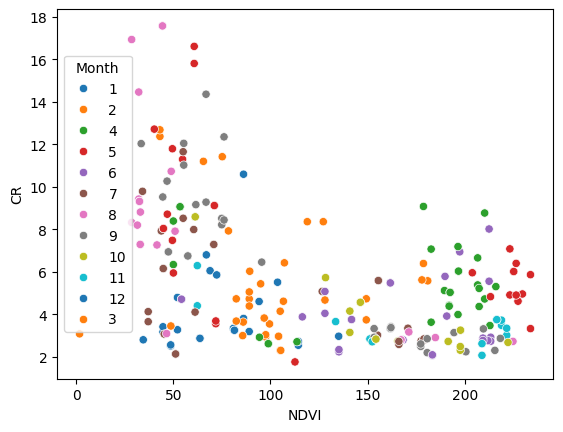

In [8]:
CatiCombined['Month'] = CatiCombined['Date'].dt.month.astype(str)

sns.scatterplot(data=CatiCombined, x="NDVI", y="CR", hue="Month", palette="tab10")

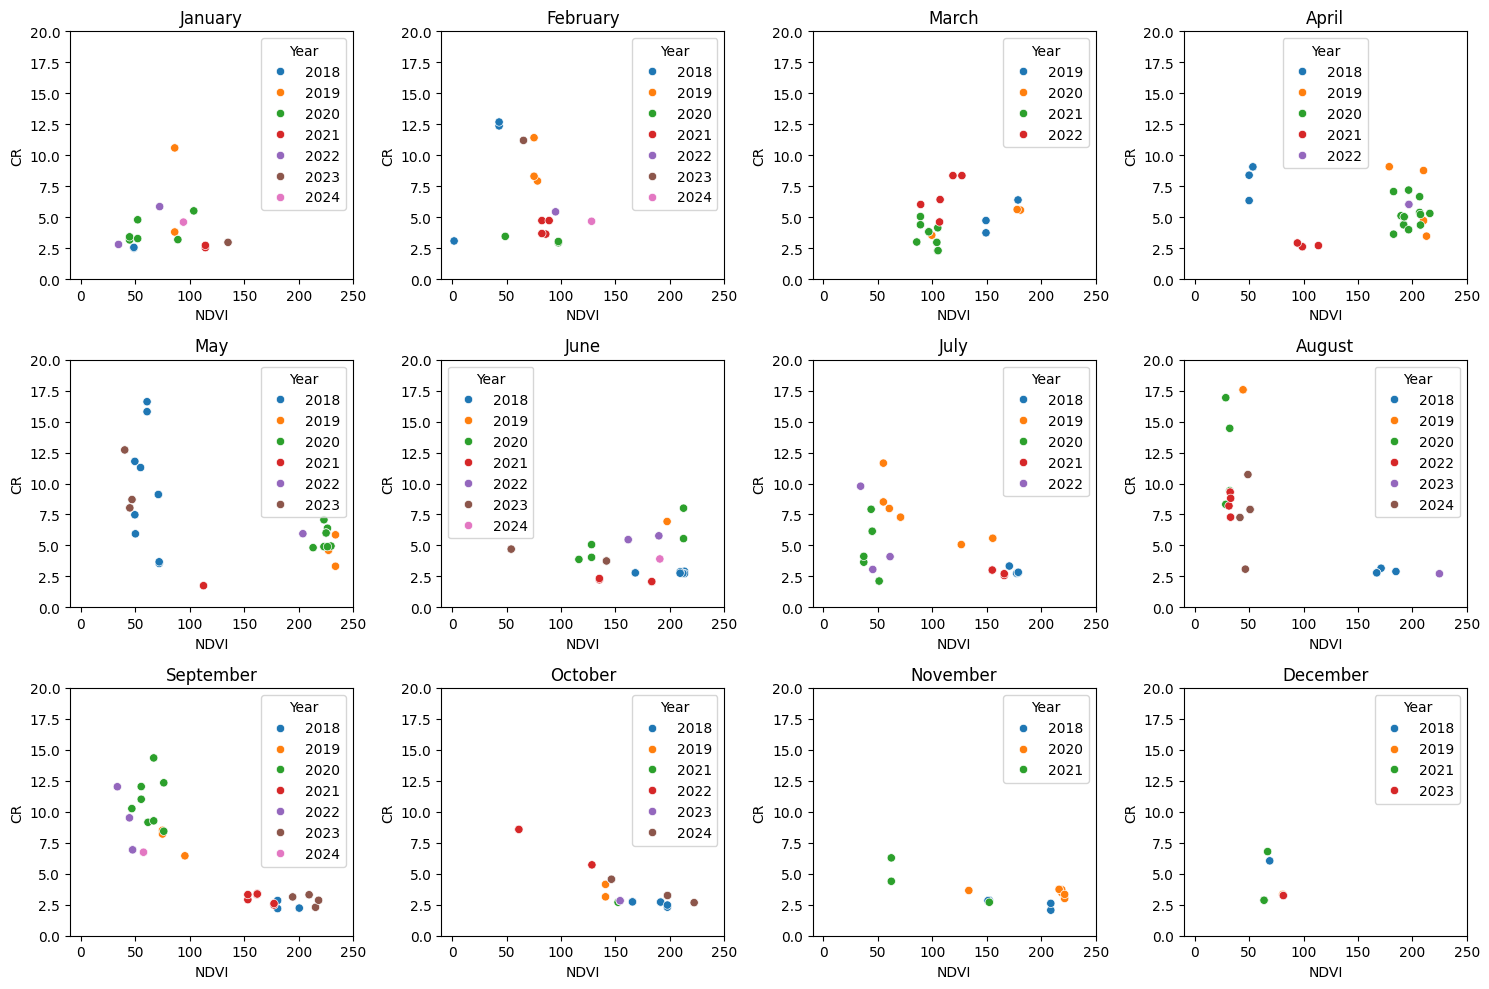

In [9]:
month_available = [i+1 for i in range(12)]
month_str = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"}
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
CatiCombined['Year'] = CatiCombined['Date'].dt.year.astype(str)

for idx, m in enumerate(month_available):
    
    current_df = CatiCombined[CatiCombined['Month'] == str(m)]
    row, col = divmod(idx, 4)
    
    sns.scatterplot(current_df, x='NDVI', y='CR', ax=axes[row, col], hue="Year")
    
    axes[row, col].set_title(month_str[m])
    axes[row, col].set_ylim(0, 20)
    axes[row, col].set_xlim(-10, 250)

plt.tight_layout()
plt.show()